In [3]:
from dxtbx.model.experiment_list import ExperimentListFactory
from matplotlib import pyplot as plt
import os
from dxtbx.command_line.plot_detector_models import plot_group
from xfel.command_line.cspad_detector_congruence import iterate_detector_at_level, iterate_panels
from scitbx.matrix import col
# original root = "/reg/d/psdm/cxi/cxi78513/res/brewster/paper_2017/metrology/t012_rg001_3000_expanding_rd/v5_refine"
root = "data/figure1"
refined_filename = "cspad_refined_experiments_step7_level2.json"

In [4]:
experiments = ExperimentListFactory.from_json_file(os.path.join(root, refined_filename), check_format=False)
assert len(experiments.detectors()) == 1
detector = experiments.detectors()[0]

In [5]:
def show_vectors(level):
    plt.figure()
    ax = plt.gca()
    plot_group(detector.hierarchy(), 'black', ax, orthographic=True)
    plt.axes().set_aspect('equal', 'datalim')
    for group in iterate_detector_at_level(detector.hierarchy(), 0, level):
        origin = col(group.get_origin())
        fast = col(group.get_fast_axis())*10
        slow = col(group.get_slow_axis())*10
        ax.arrow(origin[0], origin[1], fast[0], fast[1],
                 head_width=5.0, head_length=10.0, fc='b', ec='b')
        ax.arrow(origin[0], origin[1], slow[0], slow[1],
                 head_width=5.0, head_length=10.0, fc='r', ec='r')
    plt.title("Detector level %d"%level)
    plt.xlabel("mm")
    plt.ylabel("mm")

        

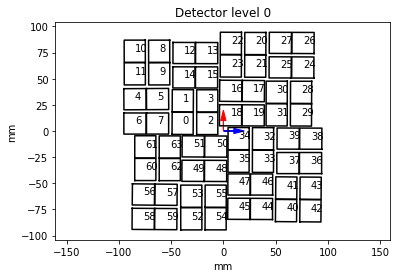

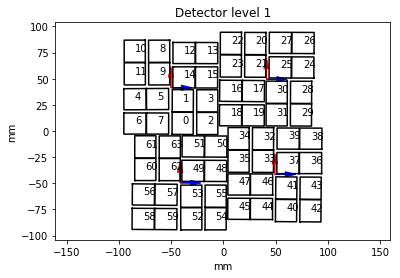

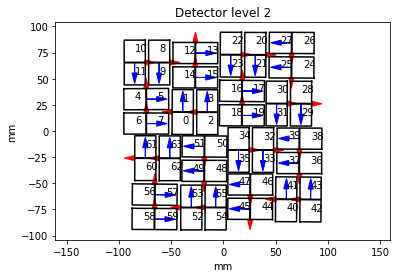

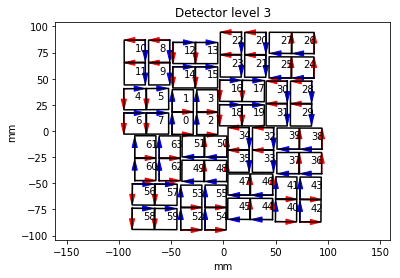

In [6]:
show_vectors(0)
show_vectors(1)
show_vectors(2)
show_vectors(3)
plt.show()